In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

renomear = {
    'work_year': 'Ano',
    'job_title': 'Cargo',
    'employee_residence': 'País'
}

df.rename(columns=renomear, inplace=True)

In [13]:
df_inicial = df.dropna()

df_inicial.isnull().sum()

Ano                 0
experience_level    0
employment_type     0
Cargo               0
salary              0
salary_currency     0
salary_in_usd       0
País                0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [16]:
df_inicial = df_inicial.assign(Ano = df_inicial['Ano'].astype('int64'))

renomear_salario = {
    'salary': 'Salário',
    'salary_in_usd': 'Salário em Dolar'
}

df_inicial.rename(columns=renomear_salario, inplace=True)

df_inicial.head()

,Ano,experience_level,employment_type,Cargo,Salário,salary_currency,Salário em Dolar,País,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


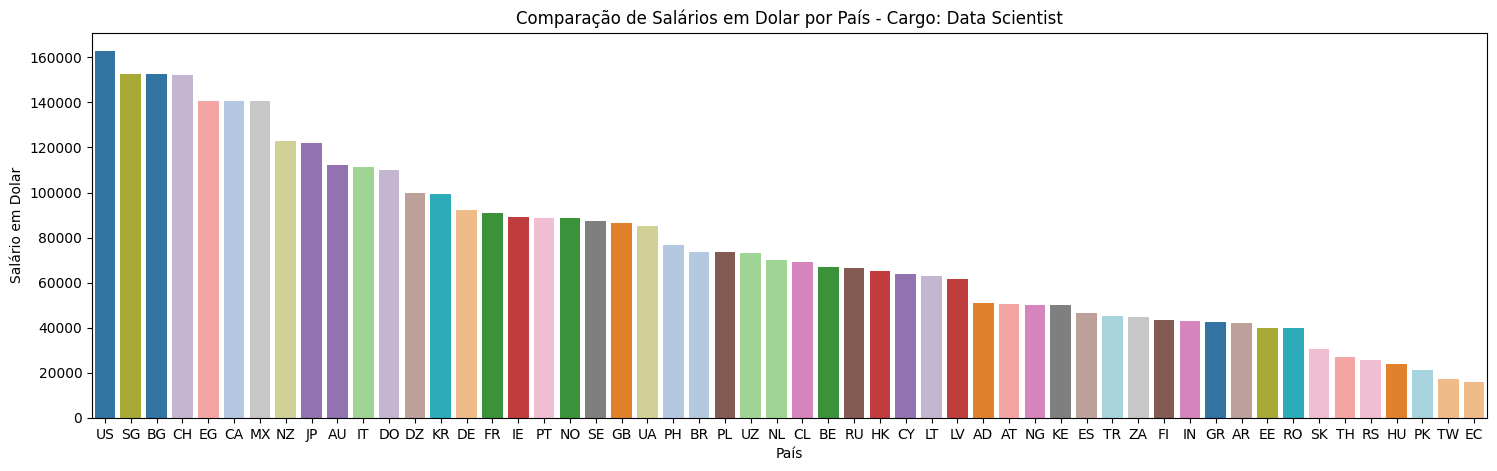

In [42]:
df_ds = df_inicial[df_inicial['Cargo'] == 'Data Scientist']
ordem_ds = df_ds.groupby('País')['Salário em Dolar'].mean().sort_values(ascending=False)

plt.figure(figsize=(18,5))
sns.barplot(data=df_ds, x='País', y='Salário em Dolar', order=ordem_ds.index, palette='tab20', hue='País', errorbar=None)
plt.title('Comparação de Salários em Dolar por País - Cargo: Data Scientist')
plt.xlabel('País')
plt.ylabel('Salário em Dolar')

plt.show()

In [63]:
import plotly.express as px
import pycountry

def alpha2_to_alpha3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except:
        return None

# Calcula o salário médio por país para Data Scientist
df_ds = df_inicial[df_inicial['Cargo'] == 'Data Scientist']
media_pais = df_ds.groupby('País')['Salário em Dolar'].mean().reset_index()

media_pais['Salário em Dolar'] = media_pais['Salário em Dolar'].round(0)
media_pais['País_Alvo'] = media_pais['País'].apply(alpha2_to_alpha3)

# Cria o mapa interativo
fig = px.choropleth(
    media_pais,
    locations='País_Alvo',
    locationmode='ISO-3',
    color='Salário em Dolar',
    color_continuous_scale='Viridis',
    title='Salário Médio de Data Scientist por País'
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin={"r":0,"t":40,"l":0,"b":0},
    width=900,
    height=500,
    coloraxis_colorbar=dict(
        tickformat=".2f",
        title="Salário em Dolar"
    )
)
fig.update_traces(
    hovertemplate='<b>País: %{location}</b><br>Salário Médio: %{z:.2f} USD<br>'
)
fig.show()